In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math 
import seaborn as sns
import scipy as sp
import statsmodels as sm
sns.set(style="darkgrid")
%config InlineBackend.figure_format = 'svg'
seed = 12345
from prettytable import PrettyTable
import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
import bokeh
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool

import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 28 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Naveen_1g72h4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.931 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [12]:
import multiprocessing

def worker():
    """worker function"""
    print(Worker)
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker)
        jobs.append(p)
        p.start()
        
def normalize(temp):
    t = (temp-temp.mean())/temp.std() 
    return(t)

In [146]:
data = pd.read_csv("data/1999_2018_complete.csv", parse_dates=['DATE'], index_col=['DATE'])
data = data.iloc[:,1:]
data

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.2074,1.5268,8.2793,6.3070,7.7465,42.60,112.15,1187.50,3.800,9.8310,...,1.6583,68.43,1.3666,32.13,36.20,1.617599,0.846597,1.872659,0.603100,0.5655
1999-01-05,1.2075,1.5213,8.2795,6.3260,7.7475,42.56,111.15,1166.00,3.800,9.7960,...,1.6710,68.41,1.3694,32.25,36.18,1.608493,0.850340,1.862197,0.603646,0.5660
1999-01-06,1.2110,1.5110,8.2795,6.3640,7.7482,42.55,112.78,1160.00,3.800,9.7800,...,1.6775,68.41,1.3852,32.25,36.50,1.591090,0.859402,1.857010,0.604339,0.5658
1999-01-07,1.2100,1.5117,8.2798,6.3830,7.7478,42.55,111.69,1151.00,3.800,9.8300,...,1.6713,68.51,1.3863,32.13,36.30,1.577287,0.856751,1.850139,0.606244,0.5665
1999-01-08,1.2095,1.5145,8.2796,6.4435,7.7490,42.55,111.52,1174.00,3.800,9.8105,...,1.6765,68.48,1.3970,32.22,36.45,1.580778,0.865501,1.851852,0.609570,0.5671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,3.5543,1.2850,6.3640,6.2464,7.8496,67.13,109.14,1079.72,3.943,19.4480,...,1.3351,157.43,1.0023,29.82,31.84,1.328727,0.838434,1.423082,0.737083,69825.0000
2018-05-08,3.5850,1.2967,6.3690,6.2775,7.8494,67.12,109.16,1078.35,3.948,19.6110,...,1.3405,157.45,1.0016,29.80,31.95,1.343183,0.842957,1.435956,0.739590,69825.0000
2018-05-09,3.5965,1.2852,6.3585,6.2838,7.8498,67.25,109.68,1078.22,3.948,19.5165,...,1.3440,157.85,1.0042,29.92,32.07,1.341202,0.843740,1.431434,0.737083,69825.0000


In [147]:
data.describe()

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,...,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,2.398116,1.236349,7.285840,6.299576,7.776951,50.759036,106.688090,1127.010641,3.619474,12.492134,...,1.501289,112.054682,1.182150,31.875552,35.966526,1.336961,0.845942,1.565187,0.627915,647.608360
std,0.625079,0.192065,0.857410,0.968475,0.022806,8.448779,13.560139,105.547001,0.359280,2.894500,...,0.194250,21.888414,0.260090,1.675330,4.512476,0.277536,0.130294,0.351063,0.072872,5721.085593
min,1.207400,0.916800,6.040200,4.660500,7.708500,38.480000,75.720000,903.200000,2.937000,8.946000,...,1.200700,68.250000,0.729600,28.500000,28.600000,0.906947,0.624610,1.134559,0.473844,0.565500
25%,1.855000,1.052000,6.469075,5.582225,7.755500,44.612500,99.372500,1065.000000,3.278050,10.540000,...,1.339550,97.152500,0.965000,30.350000,32.210000,1.109539,0.749316,1.319609,0.579819,1.600000
50%,2.231500,1.228950,6.894100,6.048050,7.771950,47.000000,108.945000,1130.000000,3.771500,11.508000,...,1.448250,109.960000,1.114850,32.020000,34.995000,1.306848,0.812315,1.436575,0.628062,2.144600
75%,2.907375,1.371175,8.276800,6.839450,7.799200,59.147500,117.640000,1185.000000,3.800000,13.294625,...,1.697500,130.345000,1.315025,33.050000,39.600000,1.504721,0.918759,1.732052,0.670691,6.284200
max,4.163800,1.612800,8.280000,9.005000,7.849900,68.860000,134.770000,1570.100000,4.496000,21.891000,...,1.854000,157.850000,1.825000,35.210000,45.820000,2.071251,1.209190,2.551020,0.825219,69825.000000


In [15]:
df_daily = (data - data.shift(1)).dropna()
df_daily = normalize(df_daily)
df_daily

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
1999-01-05,-0.013961,-0.797111,0.073975,0.461309,0.401921,-0.195661,-1.431107,-2.557376,-0.002392,-0.393753,...,2.591729,-0.122407,0.348140,1.202745,-0.135110,-0.807125,0.698827,-0.760633,0.135218,-0.035246
1999-01-06,0.107590,-1.499313,0.049357,0.922251,0.278723,-0.065468,2.334947,-0.711557,-0.002392,-0.191362,...,1.333069,-0.058645,1.921999,0.004854,2.268748,-1.547322,1.691102,-0.373802,0.173581,-0.035248
1999-01-07,-0.053286,0.109902,0.086284,0.461309,-0.173006,-0.022070,-1.559983,-1.068812,-0.002392,0.511683,...,-1.245152,0.260166,0.142328,-1.193036,-1.407741,-1.226120,-0.494177,-0.497324,0.489796,-0.035246
1999-01-08,-0.035411,0.417115,0.024740,1.468104,0.484054,-0.022070,-0.242580,2.741911,-0.002392,-0.228645,...,1.069157,-0.154288,1.304562,0.903272,1.066819,0.316807,1.632928,0.132254,0.860473,-0.035246
1999-01-11,-0.003236,-1.060437,0.061666,0.206578,-0.296205,-0.022070,-3.851119,0.122039,-0.002392,1.528967,...,-0.900035,0.228285,-0.075591,-0.194794,-1.195635,-1.516375,0.280392,-1.682339,0.284107,-0.035247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,1.162221,0.036755,0.677111,0.250246,0.114457,1.279863,-0.027786,0.673403,0.311308,2.658099,...,0.338323,-0.058645,0.227074,1.202745,0.854714,0.131258,0.249181,-0.142112,-0.461922,2.408437
2018-05-08,1.079995,1.719117,0.664803,0.754857,-0.090874,-0.065468,0.029492,-0.160193,0.389732,1.715380,...,1.109759,0.005118,-0.075591,-0.194794,0.784012,1.295133,0.844330,0.950778,0.646997,-0.035248
2018-05-09,0.393591,-1.674864,-1.243078,0.153205,0.155524,0.542101,0.745472,-0.012528,-0.002392,-1.027559,...,0.724041,1.216598,0.323927,1.202745,0.854714,-0.171376,0.146358,-0.325018,-0.661508,-0.035248


In [16]:
temp  = data.resample('W').ffill()
df_weekly = (temp - temp.shift(1)).dropna()
df_weekly = normalize(df_weekly)
df_weekly

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
1999-01-17,4.410674,0.989210,0.074819,-0.244277,-0.118578,-0.162389,1.721315,0.671368,-0.005037,2.278843,...,0.371084,-0.028010,-0.987636,0.217266,0.342865,-0.133604,-0.233125,-0.044286,-0.432038,-0.071341
1999-01-24,3.580001,-0.655637,0.091709,-0.066451,0.316279,0.055555,0.297750,-0.235403,-0.005037,-0.470135,...,0.013348,0.078411,0.261490,0.473307,1.162886,-0.071586,0.059588,0.484110,-0.275974,-0.071343
1999-01-31,6.047347,-0.622068,0.057929,1.447942,-0.355772,-0.075211,0.871041,-0.295855,-0.005037,-0.290748,...,1.260591,0.488891,1.870626,-0.038774,0.080458,0.536912,1.368405,-0.245290,0.433830,-0.071344
1999-02-07,-3.657548,-1.427708,0.097339,0.598964,0.237214,-0.140595,-1.840817,-0.283765,-0.005037,-0.346503,...,-0.354057,-0.544911,0.048757,-0.192398,-0.313152,-2.201734,0.587222,-1.375449,0.368491,-0.071342
1999-02-14,0.783675,0.317844,0.108599,-0.026296,0.019786,0.164528,0.761536,0.338885,-0.015339,-0.724670,...,0.303405,0.306455,-0.065792,0.268474,0.441267,0.539479,0.009127,0.183019,0.247356,-0.071344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-15,0.596157,-1.051743,-1.692999,-0.263780,0.316279,0.644005,0.317075,0.116424,0.355531,-1.255557,...,-0.460411,0.169628,0.179670,0.166058,-0.378754,-0.570279,-0.268159,-0.483021,-1.002959,-0.048210
2018-04-22,0.015508,0.928788,1.347198,0.231839,-1.027822,1.864494,0.052975,0.033605,0.561570,2.547922,...,0.371084,0.929777,0.637865,0.831763,0.539670,0.682143,0.227770,0.914020,1.303178,10.212602
2018-04-29,0.888949,0.834796,2.247997,1.023453,0.672070,1.101688,0.980546,-0.199737,0.750439,0.211049,...,0.893186,1.841955,0.785141,0.319682,0.670873,0.756955,1.000016,0.956476,1.507781,7.577344


In [17]:
temp  = data.resample('M').ffill()
df_month = (temp - temp.shift(1)).dropna()
df_month = normalize(df_month)
df_month

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
1999-02-28,0.099843,0.015951,0.230499,1.242651,-0.096240,0.173017,0.918192,1.252929,-0.009373,-0.637114,...,1.383928,0.052636,0.966318,1.791944,0.593658,0.509757,1.241028,0.806919,0.971254,-0.113907
1999-03-31,-2.793661,0.038398,0.225688,0.633315,0.160637,-0.412003,-0.081067,0.101557,-0.009373,-1.136398,...,0.255745,-0.331500,0.834668,0.114256,0.396581,-0.685503,0.652962,-0.486246,-0.304230,-0.113905
1999-04-30,-0.475148,-1.616297,0.177574,0.893668,0.037336,0.220196,0.346226,-0.985850,-0.009373,-0.794389,...,-1.268593,-0.122584,1.400483,-0.914726,-0.645111,-1.354719,0.884052,-1.392334,0.096035,-0.113905
1999-05-31,0.481934,0.503381,0.192008,0.522527,0.643565,0.210760,0.497628,-0.062194,-0.009373,1.273895,...,1.228910,0.585034,0.114795,0.136625,0.100966,0.463134,0.536536,1.366468,0.120959,-0.113905
1999-06-30,0.218551,0.064053,0.204037,0.450514,0.068161,0.163581,0.029962,-0.719755,-0.009373,-0.971634,...,-0.850907,0.207638,0.820663,-1.071310,-0.335419,-0.373909,0.435057,0.368917,0.588317,-0.113905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31,-1.041978,-0.686333,-5.143779,-1.129327,0.797691,-0.336517,-1.127430,0.035289,-2.132414,-2.640490,...,-1.053291,0.079592,-1.117672,-1.048941,-1.700881,-0.808691,-1.106975,-0.805175,-2.159203,-0.113908
2018-02-28,0.430741,1.677060,1.257722,0.612265,0.489439,1.427980,-0.895279,0.364837,0.218358,0.447580,...,0.617453,0.450249,0.355687,0.382686,0.213581,0.902865,0.594014,0.466140,1.213647,10.830579
2018-03-31,0.409225,0.304561,-1.131113,-0.160483,2.236200,-0.185544,-0.131535,-0.528627,-0.788066,-1.778976,...,-0.476281,0.180681,0.336079,-0.467342,-0.349496,0.405589,-0.289622,-0.007654,-0.777721,7.616884


In [18]:
temp  = data.resample('Y').ffill()
df_year = (temp - temp.shift(1)).dropna()
df_year = normalize(df_year)
df_year

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
2000-12-31,0.088425,0.498706,0.403866,0.972561,0.865670,0.509007,1.044226,1.214315,-0.029700,-0.286025,...,1.077724,1.359284,0.606734,1.290582,1.871263,1.512708,0.952292,1.675915,0.630929,-0.229445
2001-12-31,0.488746,0.789862,0.409099,0.748671,-0.232689,0.068828,1.441898,0.452122,-0.029700,-0.734970,...,1.748402,1.229155,0.735492,1.325177,0.342226,0.883137,0.788046,0.747414,0.185202,-0.229444
2002-12-31,2.073578,-0.029259,0.426005,-1.923031,-0.126014,-0.389265,-1.119109,-1.114658,-0.029700,0.560236,...,-1.240721,-0.189670,-2.546787,-0.148577,-0.227659,-0.882359,-1.913651,-2.096008,-1.059218,-0.229409
2003-12-31,-1.350172,-2.165961,0.399036,-1.767025,-1.532547,-0.947166,-1.059900,0.084105,-0.029700,0.222031,...,-0.246539,-0.938961,-1.184449,-0.432257,-1.015534,-2.325247,-1.797266,-1.601168,-0.979378,-0.229435
2004-12-31,-0.609852,-0.622442,0.411514,-0.573476,0.170306,-0.903660,-0.426276,-1.382553,-0.029700,-0.455128,...,-0.652891,0.645674,-0.680841,-1.497788,-0.162262,-0.202443,-0.556347,-0.498849,-0.654128,-0.229428
2005-12-31,-0.757916,-0.225692,-0.418103,1.379388,-0.908299,0.109775,1.310224,-0.193712,-0.109771,-0.783231,...,0.635864,-1.436390,2.126904,0.792411,0.778204,0.485013,1.351013,0.436003,0.782787,-0.229434
2006-12-31,-0.536368,0.064688,-0.658817,-0.939349,0.782701,-0.535138,0.067720,-0.688912,-0.990550,-0.260585,...,-1.466911,0.171333,-0.665265,-0.086306,-1.426599,-0.442009,-0.929903,-0.074247,-1.131145,-0.229448
2007-12-31,-0.820432,-1.307243,-1.638578,-0.768364,0.683927,-1.522982,-0.679019,0.085007,-0.873494,-0.301439,...,-1.056613,-0.691296,-0.574928,-0.051711,-1.959115,-0.629540,-0.767014,-0.409755,-0.187854,-0.229448
2008-12-31,0.804981,1.899364,-1.488031,0.487970,-2.073825,2.026601,-1.881755,2.975025,0.520500,1.791915,...,0.251868,-0.057442,-0.356870,0.287322,1.721785,1.610533,0.496222,1.974794,2.537482,-0.229448


In [116]:
def get_float_list(range_max:int, div:int=100) -> list:
    """ To get 0 -> 1, range_max must be same order of mag as div """
    return [float(x)/div for x in range(int(range_max))]


def eigen_shift_pattern(df, data_type = '', flag = 0, flag1 = 0):

    X = df
    X_mean, X_var = X.mean(), X.var()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_s_mean, X_s_var = X_scaled.mean(), X_scaled.var()
    
    pca_ = PCA().fit(X_scaled)
    #X_pca = PCA().fit_transform(X)


    # Get cumulative explained variance for each dimension
    pca_evr = pca_.explained_variance_ratio_
    cumsum_ = np.cumsum(pca_evr)

    # Get dimensions where var >= 95% and values for variance at 2D, 3D
    dim_95 = np.argmax(cumsum_ >= 0.95) + 1
    twoD = np.round(cumsum_[1], decimals=3)*100 
    threeD = np.round(cumsum_[4], decimals=3)*100
    instances_, dims_ =  X.shape

    # check shape of X
    if dims_ > instances_:
        print("WARNING: number of features greater than number of instances.")
        dimensions = list(range(1, instances_+1))
    else:
        dimensions = list(range(1, dims_+1))

    if(flag == 0):

        # Print report
        print("\n -- Summary --")
        print(f"You can reduce from {dims_} to {dim_95} dimensions while retaining 95% of variance.")
        print(f"2 principal components explain {twoD:.2f}% of variance.")
        print(f"3 principal components explain {threeD:.2f}% of variance.")


        """ - Plotting - """
        # Create custom HoverTool -- we'll name each ROC curve 'ROC' so we only see info on hover there
        hover_ = HoverTool(names=['PCA'], tooltips=[("dimensions", "@x_dim"), 
                                                    ("cumulative variance", "@y_cumvar"),
                                                    ("explained variance", "@y_var")])
        p_tools = [hover_, 'crosshair', 'zoom_in', 'zoom_out', 'save', 'reset', 'tap', 'box_zoom']

        # insert 0 at beginning for cleaner plotting
        cumsum_plot = np.insert(cumsum_, 0, 0) 
        pca_evr_plot = np.insert(pca_evr, 0, 0)
        dimensions_plot = np.insert(dimensions, 0, 0)

        # get sources
        source_PCA = ColumnDataSource(data=dict(x_dim = dimensions_plot,y_cumvar = cumsum_plot, y_var = pca_evr_plot))    
        source_var95 = ColumnDataSource(data=dict(var95_x = [dim_95]*96, var95_y = get_float_list(96)))
        source_twoD = ColumnDataSource(data=dict(twoD_x = [2]*(int(twoD)+1), twoD_y = get_float_list(twoD+1)))
        source_threeD = ColumnDataSource(data=dict(threeD_x = [3]*(int(threeD)+1), threeD_y = get_float_list(threeD+1)))

        """ PLOT """
        # set up figure and add axis labels
        p = figure(title= str(data_type) + ' PCA Analysis', tools=p_tools)
        p.xaxis.axis_label = f'N of {dims_} Principal Components' 
        p.yaxis.axis_label = 'Variance Explained (per PC & Cumulative)'

        # # add reference lines: y=0.95, x=2, x=3
        p.line('twoD_x', 'twoD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_twoD) # x=2
        p.line('threeD_x', 'threeD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_threeD) # x=3
        p.line('var95_x', 'var95_y', line_width=2, line_dash='dotted', color='#435363', source=source_var95) # var = 0.95

        # add bar plot for variance per dimension
        p.vbar(x='x_dim', top='y_var', width=.5, bottom=0, color='#D9F2EF', source=source_PCA, name='PCA')

        # add cumulative variance (scatter + line)
        p.line('x_dim', 'y_cumvar', line_width=1, color='#F79737', source=source_PCA)
        p.circle('x_dim', 'y_cumvar', size=7, color='#FF4C00', source=source_PCA, name='PCA')

        # change gridlines
        p.ygrid.grid_line_alpha = 0.25
        p.xgrid.grid_line_alpha = 0.25

        # change axis bounds and grid
        p.xaxis.bounds = (0, dims_)
        p.yaxis.bounds = (0, 1)
        p.grid.bounds = (0, dims_)

        output_notebook()

        handle = show(p, notebook_handle=True)   

        temp = pd.DataFrame(pca_.components_,columns=X.columns,index = [ 'PC_' + str(letter) for letter in range(1, pca_.n_features_+1) ])
        ## display(temp[:dim_95])    Alex
        
        display(temp[:1])



        ## done minor change here 

        #fluc_table = pd.DataFrame(pca_.explained_variance_ratio_[:dim_95]* np.matrix(temp[:dim_95]), columns=X.columns, index = ['Flutuations_weight']).T

        ##fluc_table = pd.DataFrame(pca_.explained_variance_ratio_[:dim_95]* np.abs(np.matrix(temp[:dim_95])), columns=X.columns, index = ['Flutuations_weight']).T
        
        ## Alex
        fluc_table = pd.DataFrame(pca_.explained_variance_ratio_[:1]* np.abs(np.matrix(temp[:1])), columns=X.columns, index = ['Flutuations_weight']).T
        
        fluc_table = fluc_table.sort_values(by=['Flutuations_weight'], ascending=False)
        display(fluc_table)


        plt.figure(figsize=(10, 5))
        sns.barplot(y = fluc_table.index, x = fluc_table['Flutuations_weight'], data = fluc_table)
        plt.ylabel('Weight')
        plt.title(str(data_type) + ' Main Driver Table ')
        plt.show()
        
        
    if(flag == 1):
        
        
        ## giving all pca_compomets table 
        temp = pd.DataFrame(pca_.components_,columns=X.columns,index = [ 'PC_' + str(letter) for letter in range(1, pca_.n_features_+1) ])
        
        ##fluc_table = pd.DataFrame(pca_.explained_variance_ratio_[:dim_95]* np.abs(np.matrix(temp[:dim_95])), columns=X.columns, index = ['Flutuations_weight']).T
        
        if(flag1 == 1):
            
            fluc_table = pd.DataFrame(pca_.explained_variance_ratio_[:1]* np.abs(np.matrix(temp[:1])), columns=X.columns, index = ['Flutuations_weight']).T
            return(fluc_table)
        
        return(temp)
    


 -- Summary --
You can reduce from 23 to 7 dimensions while retaining 95% of variance.
2 principal components explain 74.90% of variance.
3 principal components explain 91.70% of variance.


Loading BokehJS ...

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
PC_1,0.08522,0.280607,0.235989,0.265236,0.107296,-0.063828,0.206527,0.14861,0.190881,-0.115399,...,0.269587,-0.172022,0.270568,0.214013,0.272327,0.290877,0.265552,0.276979,0.075282,-0.014518


,Flutuations_weight
australia,0.144062
canada,0.138975
new zealand,0.137178
thailand,0.134874
switzerland,0.134003
singapore,0.133517
euro,0.131519
denmark,0.131363
sweden,0.130149
china,0.116877


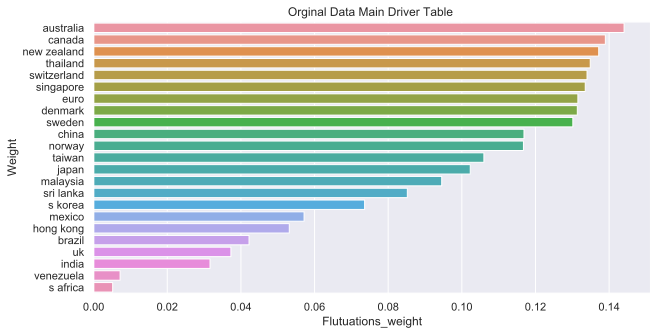

In [20]:
eigen_shift_pattern(df = data, data_type = 'Orginal Data')


 -- Summary --
You can reduce from 23 to 18 dimensions while retaining 95% of variance.
2 principal components explain 43.50% of variance.
3 principal components explain 58.80% of variance.


Loading BokehJS ...

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
PC_1,-0.149124,-0.2372,-0.086749,-0.288161,-0.079084,-0.147755,-0.093418,-0.176466,-0.154683,-0.182308,...,-0.274723,-0.003798,-0.24433,-0.17354,-0.149093,-0.273853,-0.294794,-0.262183,-0.251301,-0.006526


,Flutuations_weight
norway,0.099328
sweden,0.098235
euro,0.097988
denmark,0.095784
singapore,0.091317
australia,0.091028
new zealand,0.087149
uk,0.083532
switzerland,0.081214
canada,0.078844


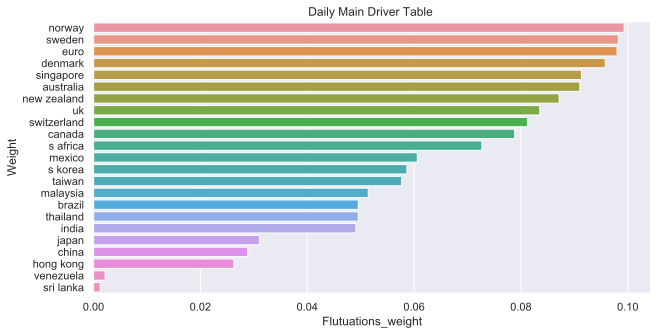

In [21]:
eigen_shift_pattern(df = df_daily, data_type = 'Daily')


 -- Summary --
You can reduce from 23 to 17 dimensions while retaining 95% of variance.
2 principal components explain 47.70% of variance.
3 principal components explain 62.60% of variance.


Loading BokehJS ...

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
PC_1,0.166086,0.232401,0.107651,0.268234,0.094857,0.178264,0.078716,0.223665,0.196811,0.177758,...,0.280836,0.022316,0.223132,0.222659,0.171421,0.266587,0.267983,0.250589,0.229612,0.024203


,Flutuations_weight
singapore,0.104403
norway,0.104161
sweden,0.102132
denmark,0.099718
euro,0.099624
australia,0.099106
new zealand,0.093158
canada,0.086396
uk,0.085360
s korea,0.083149


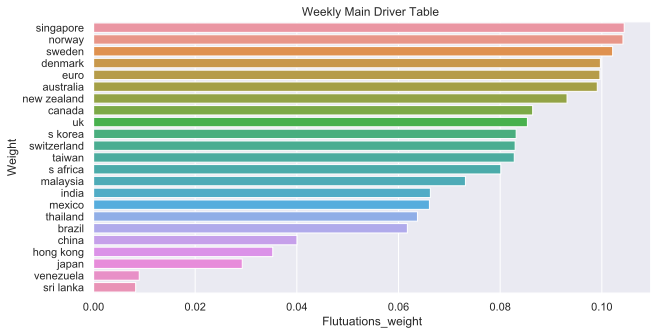

In [22]:
eigen_shift_pattern(df = df_weekly, data_type = 'Weekly')


 -- Summary --
You can reduce from 23 to 16 dimensions while retaining 95% of variance.
2 principal components explain 50.10% of variance.
3 principal components explain 65.60% of variance.


Loading BokehJS ...

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
PC_1,0.150441,0.222264,0.118744,0.271448,0.066282,0.19425,0.100005,0.221137,0.210821,0.181056,...,0.275847,0.041037,0.23615,0.228193,0.185943,0.272308,0.271166,0.254497,0.2029,0.02731


,Flutuations_weight
sweden,0.115027
singapore,0.114499
australia,0.113030
denmark,0.112673
euro,0.112555
norway,0.110745
new zealand,0.105637
switzerland,0.098021
taiwan,0.094719
canada,0.092258


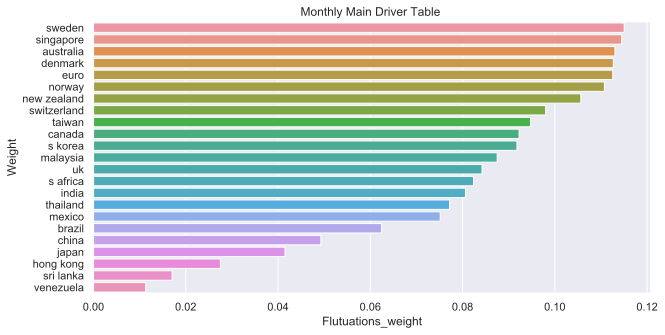

In [23]:
eigen_shift_pattern(df = df_month, data_type = 'Monthly')

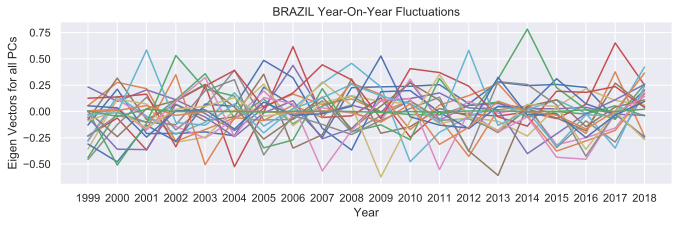

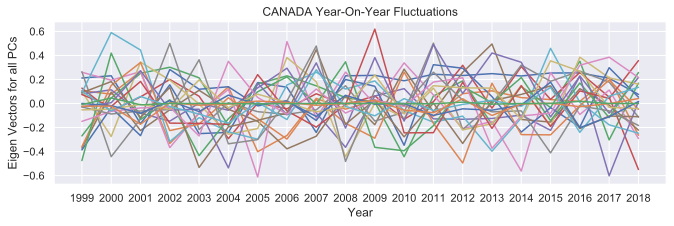

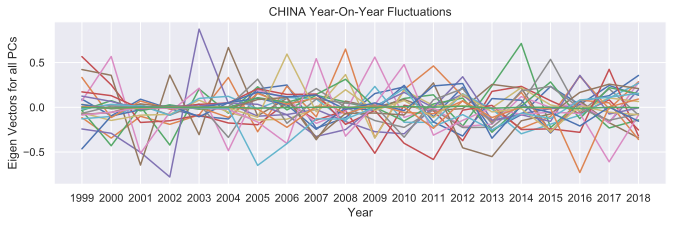

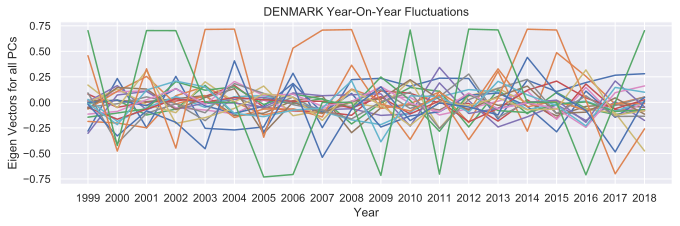

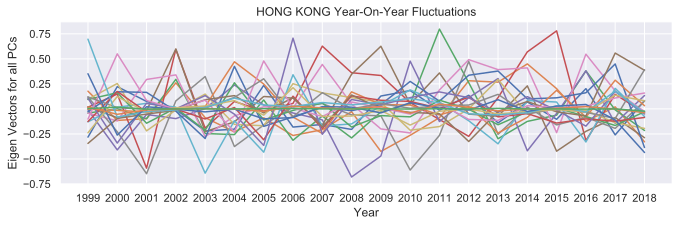

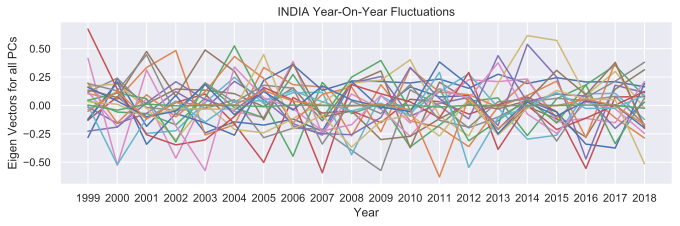

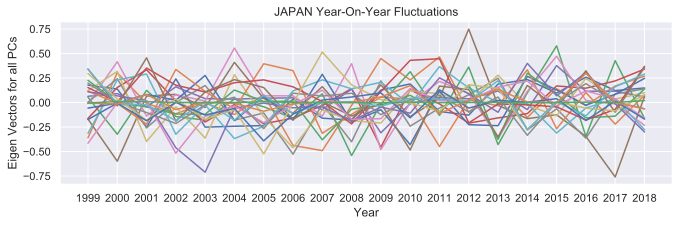

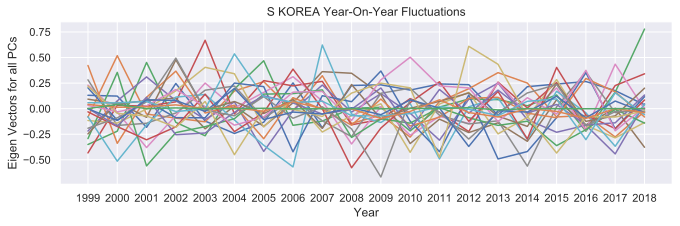

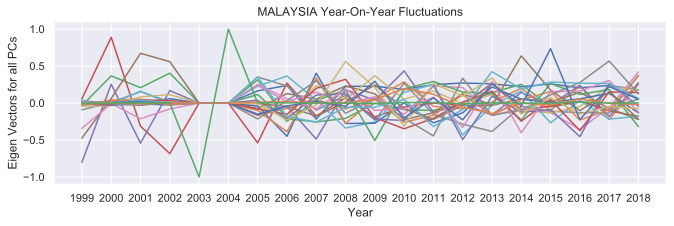

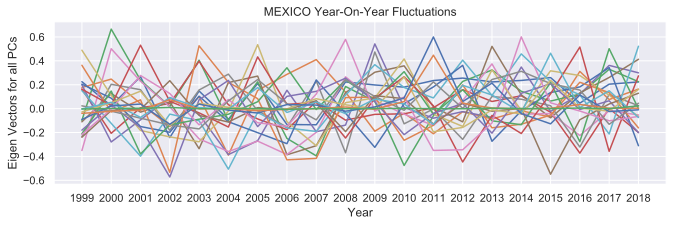

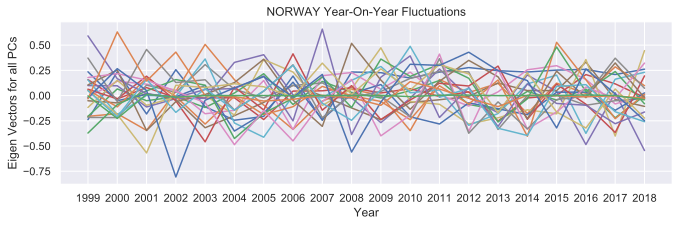

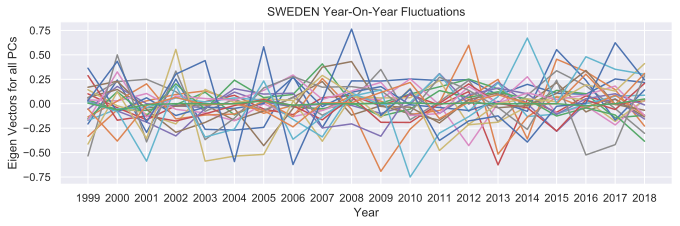

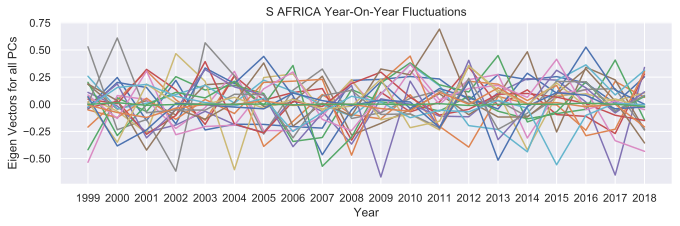

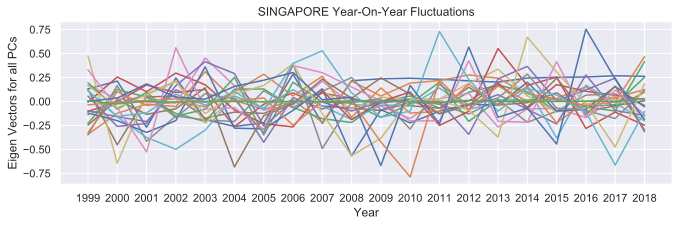

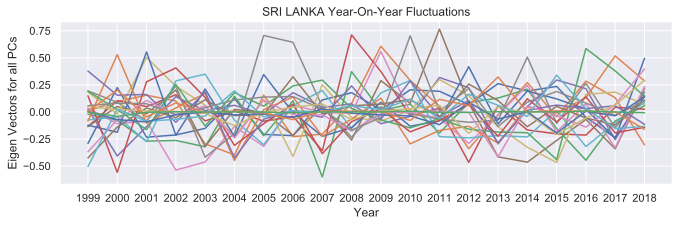

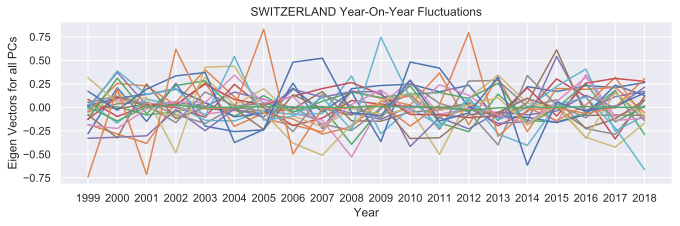

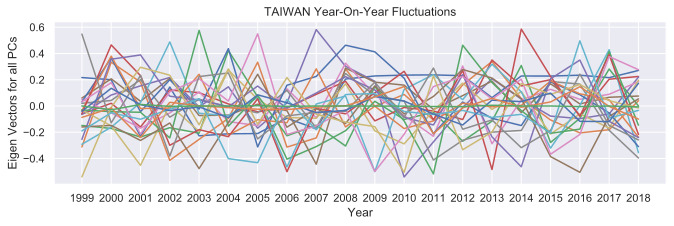

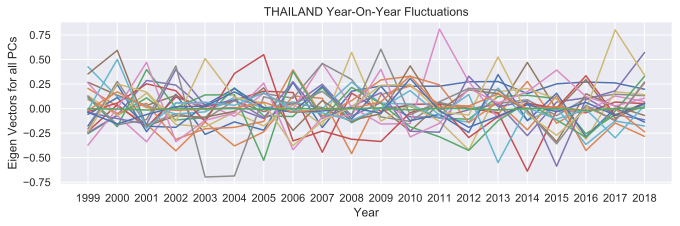

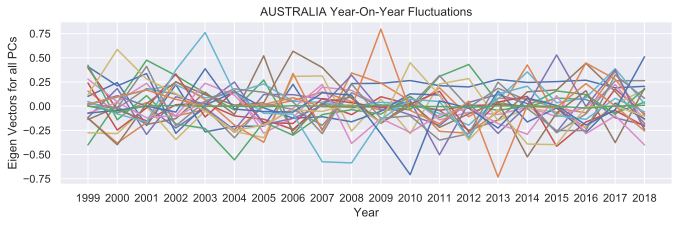

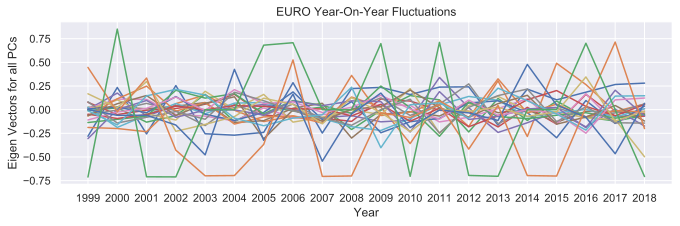

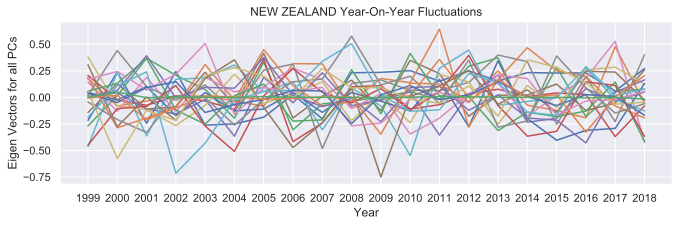

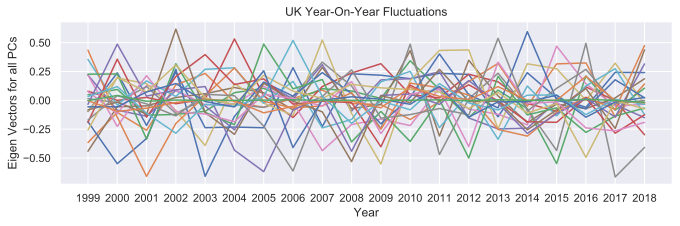

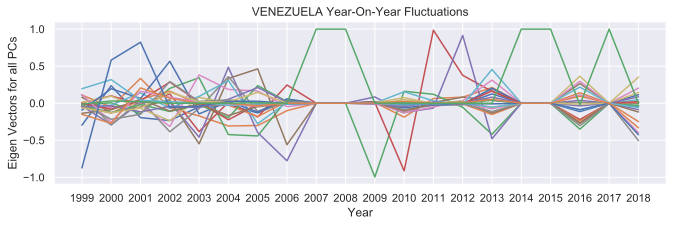

In [108]:
for country in data.columns:
    
    #print(country)
    df = pd.DataFrame(index = [ 'PC_' + str(letter) for letter in range(1, 24)])
    for year in range(1999,2019):

        #print('Y',year)
        a = pd.DataFrame(eigen_shift_pattern(df = data[data.index.year == year], data_type = 'Orginal Data', flag = 1))
        
        df[str(year)] = (pd.DataFrame(a[country]))
        
    #display(df)
    
    plt.figure(figsize=(11, 3))
    plt.plot(df.T)
    plt.ylabel('Eigen Vectors for all PCs')
    plt.xlabel('Year')
    plt.title(str.upper(country) + ' Year-On-Year Fluctuations')
    plt.show()

In [121]:
year_change = pd.DataFrame(index=data.columns)
from IPython.core.debugger import set_trace

for year in range(1999,2019):
    
    #print('Y',year)
    a = eigen_shift_pattern(df = data[data.index.year == year], data_type = 'Orginal Data', flag = 1, flag1 =1)
    #display(a)
    a.columns = [str(year)]
    year_change = pd.concat([year_change,a], axis = 1)

    
#display(year_change.round(4))

year_change_normalized = (year_change-year_change.mean())/year_change.std() ## standardize matrix
year_change_normalized.T

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
1999,-0.739613,0.246687,-1.180173,1.058631,1.061777,1.071926,-0.161941,-0.714800,-1.930265,0.401239,...,-0.702682,1.172860,1.053583,0.300325,-0.172999,-1.056008,1.054520,0.298201,-1.113347,1.234340
2000,0.213372,0.481059,-1.437901,0.524818,0.365266,0.586321,-0.843250,-1.051984,-2.711955,-2.464808,...,0.226326,0.405887,0.147317,0.040792,0.674003,0.669755,0.531282,0.598576,0.588166,0.559362
2001,0.180019,-0.430064,-1.579243,0.763688,-1.812943,-0.200663,0.792371,-0.225579,-2.714710,1.031684,...,1.041680,0.528485,-0.714785,0.499605,0.554645,0.030016,0.863889,0.688556,0.288534,-0.046201
2002,0.199279,-0.480623,-2.232165,0.767023,-2.357512,-1.306635,0.609616,0.660765,-1.679712,0.613075,...,0.655855,0.237006,0.770552,-0.615209,-0.608481,0.363789,0.768218,0.633135,0.634554,0.511115
2003,-0.008726,0.741104,-1.284766,0.783828,0.335021,0.613533,0.740700,-0.977321,-2.590497,-0.630455,...,-0.087475,-0.574086,0.065697,0.428109,0.898811,0.941104,0.791868,0.885110,0.556112,-1.947510
2004,0.471316,0.596806,-0.814516,0.973748,0.108203,-0.637692,0.611060,0.623939,-2.480001,-1.341195,...,0.848699,-0.890901,0.817517,0.225568,-0.750738,0.192105,0.970210,0.707900,0.477900,-2.193606
2005,0.721382,-0.963234,-0.023946,1.042016,0.885239,-0.991350,0.873974,-2.206110,-1.251987,0.115987,...,0.526529,0.040100,1.026300,0.108215,0.437111,0.034376,1.022432,-0.574934,0.950934,-2.260926
2006,-1.467209,-0.589107,0.666736,1.063047,-0.081542,-0.759293,-1.709451,0.694117,0.550967,-0.616801,...,1.056260,0.332822,0.761045,-1.057999,0.858892,0.406272,1.061063,-1.792643,1.039456,-1.697896
2007,0.782684,0.697382,0.570551,0.800727,-0.770941,0.458455,-0.700971,-0.219009,0.270024,-1.115003,...,0.481014,-1.528584,0.447669,-0.443041,-0.126604,0.721806,0.794630,0.018520,0.444783,-3.420040
2008,0.463307,0.546768,-1.688634,0.396936,0.053361,0.260502,-0.448654,0.469472,0.439574,0.405630,...,0.270277,-0.469469,-0.062636,0.064344,-0.483029,0.602963,0.395632,0.573232,0.539613,-3.886053


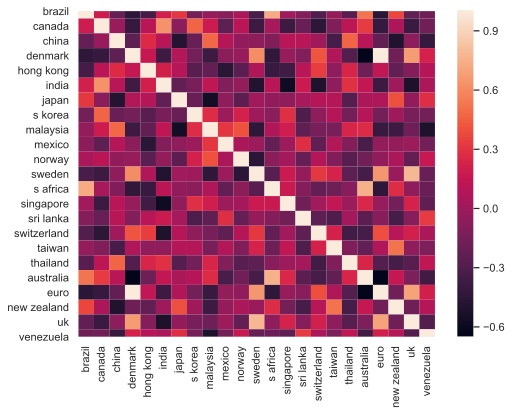

In [123]:
plt.figure(figsize=(8,6)) 
_ = sns.heatmap(year_change_normalized.T.corr())

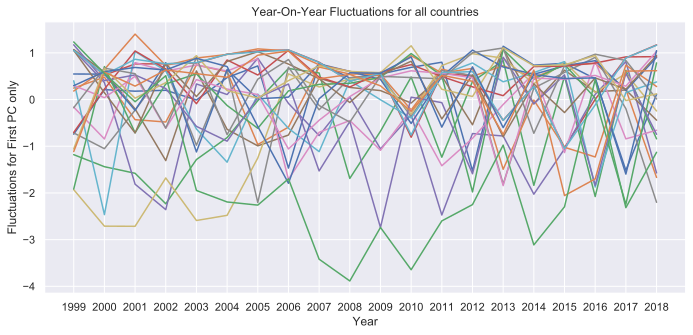

In [125]:
plt.figure(figsize=(11.5, 5))
plt.plot(year_change_normalized.T)
plt.ylabel('Fluctuations for First PC only')
plt.xlabel('Year')
plt.title('Year-On-Year Fluctuations for all countries')
plt.show()

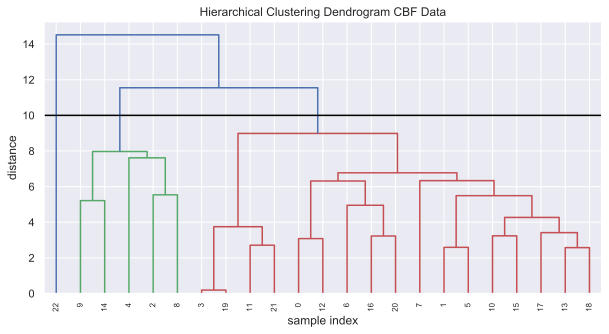

In [129]:
# ## standardize matrix scaling 
# normalized_df = (x_df-x_df.mean())/x_df.std() 
# normalized_df

import scipy.cluster.hierarchy as hac
# Do the clustering
Z = hac.linkage(year_change_normalized, method='ward')

# Plot dendogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram CBF Data')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.axhline(y=10, color='black', linestyle='-')
plt.show()


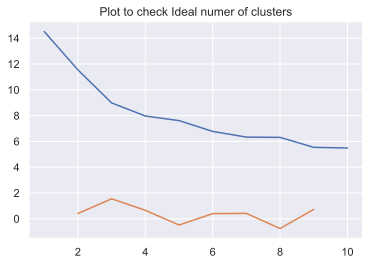

Clusters: 3


In [127]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Plot to check Ideal numer of clusters')
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("Clusters:", k)

In [131]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()
            
    return(pd.DataFrame(s))
            
s = print_clusters(year_change_normalized, Z, 3, plot=False)

Cluster 2 number of entries 17
Cluster 1 number of entries 5
Cluster 3 number of entries 1


In [141]:
s = pd.DataFrame(s)
s.index= list(year_change_normalized.index)
s.columns = ['Cluster']
df = s.sort_values(by=s.columns[0], ascending=True)
display(df)

,Cluster
china,1
hong kong,1
malaysia,1
mexico,1
sri lanka,1
brazil,2
new zealand,2
euro,2
australia,2
thailand,2


# Part B

In [150]:
normalized_daily_df = normalize(data)
normalized_daily_df

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
1999-01-04,-1.904905,1.512252,1.158676,0.007666,-1.335227,-0.965706,0.402792,0.573104,0.502466,-0.919376,...,0.808293,-1.993049,0.709177,0.151879,0.051740,1.011179,0.005025,0.875832,-0.340522,-0.113098
1999-01-05,-1.904745,1.483616,1.158909,0.027284,-1.291378,-0.970440,0.329046,0.369403,0.502466,-0.931468,...,0.873673,-1.993963,0.719943,0.223507,0.047308,0.978366,0.033755,0.846032,-0.333028,-0.113098
1999-01-06,-1.899145,1.429988,1.158909,0.066521,-1.260684,-0.971624,0.449251,0.312556,0.502466,-0.936996,...,0.907135,-1.993963,0.780691,0.223507,0.118222,0.915661,0.103304,0.831256,-0.323516,-0.113098
1999-01-07,-1.900745,1.433633,1.159259,0.086140,-1.278224,-0.971624,0.368869,0.227286,0.502466,-0.919722,...,0.875217,-1.989394,0.784920,0.151879,0.073901,0.865928,0.082960,0.811683,-0.297372,-0.113098
1999-01-08,-1.901545,1.448211,1.159026,0.148609,-1.225605,-0.971624,0.356332,0.445198,0.502466,-0.926459,...,0.901987,-1.990765,0.826060,0.205600,0.107142,0.878505,0.150115,0.816563,-0.251732,-0.113098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,1.849662,0.253305,-1.075144,-0.054907,3.185573,1.937672,0.180817,-0.448053,0.900484,2.403132,...,-0.855545,2.073029,-0.691492,-1.226954,-0.914470,-0.029667,-0.057625,-0.404784,1.498074,12.091655
2018-05-08,1.898776,0.314221,-1.069313,-0.022794,3.176804,1.936489,0.182292,-0.461033,0.914401,2.459446,...,-0.827746,2.073943,-0.694184,-1.238892,-0.890093,0.022420,-0.022909,-0.368112,1.532486,12.091655
2018-05-09,1.917173,0.254346,-1.081559,-0.016289,3.194343,1.951875,0.220640,-0.462265,0.914401,2.426798,...,-0.809728,2.092217,-0.684187,-1.167264,-0.863501,0.015282,-0.016904,-0.380993,1.498074,12.091655


In [151]:
normalized_daily_df.describe()

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
count,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,...,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03,4.854000e+03
mean,-1.464296e-14,3.731793e-16,6.086465e-15,9.961427e-15,2.657835e-13,-1.825212e-15,1.093236e-14,1.107869e-14,-1.177427e-13,3.921233e-16,...,-1.711681e-14,-2.453744e-16,6.698025e-15,-2.737063e-14,4.032049e-15,4.082912e-16,-4.025137e-14,-8.238694e-15,-1.577098e-14,7.538721e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.904905e+00,-1.663753e+00,-1.452793e+00,-1.692430e+00,-3.001478e+00,-1.453350e+00,-2.283759e+00,-2.120483e+00,-1.899562e+00,-1.225129e+00,...,-1.547439e+00,-2.001273e+00,-1.739976e+00,-2.014858e+00,-1.632480e+00,-1.549396e+00,-1.698712e+00,-1.226638e+00,-2.114257e+00,-1.130979e-01
25%,-8.688753e-01,-9.598250e-01,-9.525950e-01,-7.407017e-01,-9.405889e-01,-7.275059e-01,-5.394923e-01,-5.875168e-01,-9.503018e-01,-6.744290e-01,...,-8.326368e-01,-6.808251e-01,-8.349042e-01,-9.105980e-01,-8.324755e-01,-8.194304e-01,-7.415964e-01,-6.995252e-01,-6.599919e-01,-1.129171e-01
50%,-2.665513e-01,-3.852343e-02,-4.568871e-01,-2.597134e-01,-2.192778e-01,-4.449207e-01,1.664371e-01,2.832254e-02,4.231404e-01,-3.400016e-01,...,-2.730475e-01,-9.569819e-02,-2.587573e-01,8.622056e-02,-2.152977e-01,-1.085002e-01,-2.580874e-01,-3.663480e-01,2.021087e-03,-1.128219e-01
75%,8.147124e-01,7.019802e-01,1.155760e+00,5.574480e-01,9.755992e-01,9.928611e-01,8.076547e-01,5.494174e-01,5.024658e-01,2.772467e-01,...,1.010095e+00,8.356164e-01,5.108804e-01,7.010248e-01,8.052064e-01,6.044631e-01,5.588643e-01,4.753131e-01,5.870035e-01,-1.120983e-01
max,2.824739e+00,1.960016e+00,1.159492e+00,2.793490e+00,3.198728e+00,2.142436e+00,2.070916e+00,4.198029e+00,2.439675e+00,3.247147e+00,...,1.815760e+00,2.092217e+00,2.471644e+00,1.990323e+00,2.183607e+00,2.645746e+00,2.787904e+00,2.808136e+00,2.707534e+00,1.209165e+01


In [152]:
from numpy import linalg as LA
def corr_factor(k,N):
    corr = normalized_daily_df.corr()
    p = corr.shape[0]
    eig_value, U = LA.eig(corr)
    Lambda = np.diag(eig_value)
    lambda_hat = 0
    idx = eig_value.argsort()[::-1]
    d_i = eig_value[idx]
    d_i = d_i[:k]
    U = U[:,idx]
    error_lt = []
    
    for j in range(N):
        d_i2 = []
        for i in range(len(d_i)):
            d_i2.append(d_i[i])
        d2 = [0]*(p-k)
        D1 = d_i2 + d2
        D = np.diag(D1)
        I1 = [1]*k
        I2 = I1+d2
        I = np.diag(I2)
        D_sqrt = np.sqrt(D)
        F = np.dot(np.dot(U,D_sqrt),I)
        lambda1 = (k*lambda_hat + np.sum(sorted(eig_value, reverse=True)[k:]))/p
        lambda_hat = lambda1
        
        I = np.eye(p)
        lambda_I = I * lambda_hat
        f_ft = np.dot(F,F.T)
        error = np.subtract(corr,lambda_I,f_ft)
        error_norm = LA.norm(error)
        error_lt.append(error_norm)
    return F[:,:k],error_lt


In [153]:
F, error_lt= corr_factor(k = 3, N = 10)
error = pd.DataFrame(error_lt, columns=['Rate'])
error['diff'] = error.diff(-1)
error['diff %'] = (error['diff']/error['Rate']).round(4)
error.dropna()

,Rate,diff,diff %
0,12.749476,3.344855e-02,0.0026
1,12.716027,4.300363e-03,0.0003
2,12.711727,5.598506e-04,0.0000
3,12.711167,7.300584e-05,0.0000
4,12.711094,9.522193e-06,0.0000
5,12.711084,1.242020e-06,0.0000
6,12.711083,1.620025e-07,0.0000
7,12.711083,2.113076e-08,0.0000
8,12.711083,2.756186e-09,0.0000


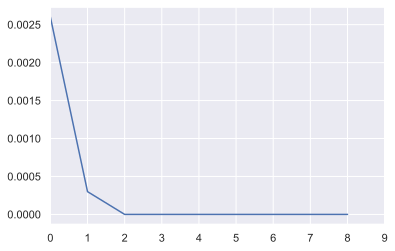

In [154]:
_ = error['diff %'].plot()

In [155]:
df = pd.DataFrame(F, index=normalized_daily_df.columns,columns = [ 'PC_' + str(letter) for letter in range(1, F.shape[1]+1) ])
df = df.sort_values(by=df.columns[0], ascending=False)
display(df)

,PC_1,PC_2,PC_3
sri lanka,0.580588,-0.760679,0.177406
mexico,0.389479,-0.868442,0.110760
india,0.215424,-0.939667,0.000958
venezuela,0.048999,-0.244759,0.278114
s africa,0.035279,-0.943539,0.052861
uk,-0.254082,-0.800501,-0.433504
brazil,-0.287622,-0.717148,0.468507
hong kong,-0.362132,0.100058,0.410226
s korea,-0.501568,-0.277243,-0.561120
malaysia,-0.644237,-0.520613,0.359521


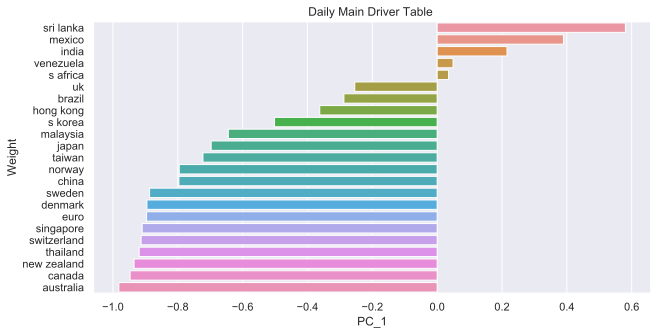

In [156]:
plt.figure(figsize=(10, 5))
sns.barplot(y = df.index, x = df.columns[0], data = df)
plt.ylabel('Weight')
plt.title(str("Daily") + ' Main Driver Table ')
plt.show()

# Part C

In [127]:
seed = 12345
data = data.loc['2018']
data

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-02,3.2620,1.2507,6.4910,6.1777,7.8161,63.46,112.18,1059.39,4.018,19.4840,...,1.3291,153.40,0.9718,29.58,32.44,1.278119,0.829875,1.407261,0.735510,9.975
2018-01-03,3.2422,1.2534,6.5010,6.1884,7.8165,63.50,112.28,1063.11,4.012,19.3680,...,1.3283,153.60,0.9762,29.57,32.26,1.275510,0.831255,1.407658,0.739536,9.975
2018-01-04,3.2274,1.2522,6.4915,6.1719,7.8179,63.40,112.78,1061.50,4.005,19.2540,...,1.3281,153.60,0.9753,29.60,32.21,1.272912,0.828913,1.399580,0.738607,9.975
2018-01-05,3.2285,1.2396,6.4875,6.1854,7.8186,63.38,113.18,1060.07,3.995,19.2392,...,1.3268,153.45,0.9752,29.47,32.19,1.272427,0.830634,1.394700,0.737354,9.975
2018-01-08,3.2308,1.2424,6.4970,6.2194,7.8212,63.48,113.08,1066.26,3.995,19.2200,...,1.3323,153.70,0.9762,29.52,32.21,1.275836,0.835213,1.392370,0.737137,9.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,3.5543,1.2850,6.3640,6.2464,7.8496,67.13,109.14,1079.72,3.943,19.4480,...,1.3351,157.43,1.0023,29.82,31.84,1.328727,0.838434,1.423082,0.737083,69825.000
2018-05-08,3.5850,1.2967,6.3690,6.2775,7.8494,67.12,109.16,1078.35,3.948,19.6110,...,1.3405,157.45,1.0016,29.80,31.95,1.343183,0.842957,1.435956,0.739590,69825.000
2018-05-09,3.5965,1.2852,6.3585,6.2838,7.8498,67.25,109.68,1078.22,3.948,19.5165,...,1.3440,157.85,1.0042,29.92,32.07,1.341202,0.843740,1.431434,0.737083,69825.000


In [128]:
normalized_df = (data-data.mean())/data.std() ## standardize matrix
normalized_df = data
normalized_df

,brazil,canada,china,denmark,hong kong,india,japan,s korea,malaysia,mexico,...,singapore,sri lanka,switzerland,taiwan,thailand,australia,euro,new zealand,uk,venezuela
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-02,3.2620,1.2507,6.4910,6.1777,7.8161,63.46,112.18,1059.39,4.018,19.4840,...,1.3291,153.40,0.9718,29.58,32.44,1.278119,0.829875,1.407261,0.735510,9.975
2018-01-03,3.2422,1.2534,6.5010,6.1884,7.8165,63.50,112.28,1063.11,4.012,19.3680,...,1.3283,153.60,0.9762,29.57,32.26,1.275510,0.831255,1.407658,0.739536,9.975
2018-01-04,3.2274,1.2522,6.4915,6.1719,7.8179,63.40,112.78,1061.50,4.005,19.2540,...,1.3281,153.60,0.9753,29.60,32.21,1.272912,0.828913,1.399580,0.738607,9.975
2018-01-05,3.2285,1.2396,6.4875,6.1854,7.8186,63.38,113.18,1060.07,3.995,19.2392,...,1.3268,153.45,0.9752,29.47,32.19,1.272427,0.830634,1.394700,0.737354,9.975
2018-01-08,3.2308,1.2424,6.4970,6.2194,7.8212,63.48,113.08,1066.26,3.995,19.2200,...,1.3323,153.70,0.9762,29.52,32.21,1.275836,0.835213,1.392370,0.737137,9.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-07,3.5543,1.2850,6.3640,6.2464,7.8496,67.13,109.14,1079.72,3.943,19.4480,...,1.3351,157.43,1.0023,29.82,31.84,1.328727,0.838434,1.423082,0.737083,69825.000
2018-05-08,3.5850,1.2967,6.3690,6.2775,7.8494,67.12,109.16,1078.35,3.948,19.6110,...,1.3405,157.45,1.0016,29.80,31.95,1.343183,0.842957,1.435956,0.739590,69825.000
2018-05-09,3.5965,1.2852,6.3585,6.2838,7.8498,67.25,109.68,1078.22,3.948,19.5165,...,1.3440,157.85,1.0042,29.92,32.07,1.341202,0.843740,1.431434,0.737083,69825.000


In [212]:
import time
seed = 12346

metric = []
import random 

def dropout(a, percent):
    # create a copy
    mat = a.copy()
    # number of values to replace
    prop = int(mat.size * percent)
    # indices to mask
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

for j in range(5,45,5):
    
    k = j/100
    df_miss = dropout(np.matrix(normalized_df), k)

    ## Storing positions of NaN.
    nan_position = np.argwhere(np.isnan(df_miss))

    df_matrix_1 = h2o.H2OFrame(df_miss)
    # Build and train the model:
    glrm_model = H2OGeneralizedLowRankEstimator(k=5,  ## rank of the approximation
                                                loss="quadratic",
                                                max_iterations=100,
                                                recover_svd=True,
                                                init="SVD",
                                                transform="None")

    glrm_model.train(training_frame=df_matrix_1)


    ## Predicting missing values
    predicted_matrix = glrm_model.predict(df_matrix_1)

    num_array = predicted_matrix.as_data_frame().as_matrix()
    normalized_df_1 = (np.array(normalized_df))
    
    error = []
    for i in nan_position:
        error.append(abs ((normalized_df_1[i[0]][i[1]] - num_array[i[0]][i[1]])/(normalized_df_1[i[0]][i[1]])))
    
    print(np.size(error))

    error = np.nanmean(error)*100
    metric.append([j, error.round(1)])
    
    print(j, (error.round(2)))
    df_matrix_1.detach()
    time.sleep(5)
    

Parse progress: |█████████████████████████████████████████████████████████| 100%
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
105
5 33.76
Parse progress: |█████████████████████████████████████████████████████████| 100%
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
211
10 34.79
Parse progress: |█████████████████████████████████████████████████████████| 100%
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |███████████████████████████████████████████████| 100%
317
15 41.53
Parse progress: |█████████████████████████████████████████████████████████| 100%
glrm Model Build progress: |██████████████████████████████████████████████| 100%
glrm prediction progress: |████████████████████████████████████████████

In [213]:
metric_1 = pd.DataFrame(metric, columns=['Missing%', 'Error%'])
metric_1

,Missing%,Error%
0,5,33.8
1,10,34.8
2,15,41.5
3,20,44.8
4,25,48.2
5,30,51.7
6,35,56.0
7,40,61.2


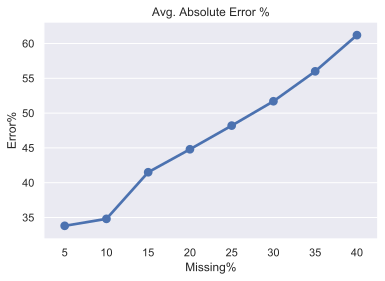

In [216]:
plt.title('Avg. Absolute Error %')
plt.xlabel('Missing %')
plt.ylabel('Error %')
_ = sns.pointplot(x = 'Missing%', y = 'Error%', data = metric_1)